<h1><b>COMPTE RENDU TP4 MACHINE LEARNING</b></h1>
<h3><b>TRINOME :</b></h3> 
<ul>
<li>MTIRI WISSEM</li>
<li>BOUZID MOHAMED AZIZ</li> 
<li>BACHA NERMINE</li>
</ul>
<hr>

<h2><b>PART A : DECISION TREE</b></h2>

In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b>DATA UNDERSTANDING</b></h3>

In [11]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
             'pedigree', 'age', 'label']
diabetes_data = pd.read_csv("./datasets/diabetes.csv", header=None, names=col_names)

In [12]:
print(diabetes_data.shape)

(769, 9)


In [14]:
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [15]:
diabetes_data.drop([0], inplace=True)

In [16]:
diabetes_data.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [17]:
diabetes_data.dtypes

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object

In [18]:
diabetes_data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [19]:
diabetes_data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,99,70,0,0,32,0.258,22,0
freq,135,17,57,227,374,13,6,72,500


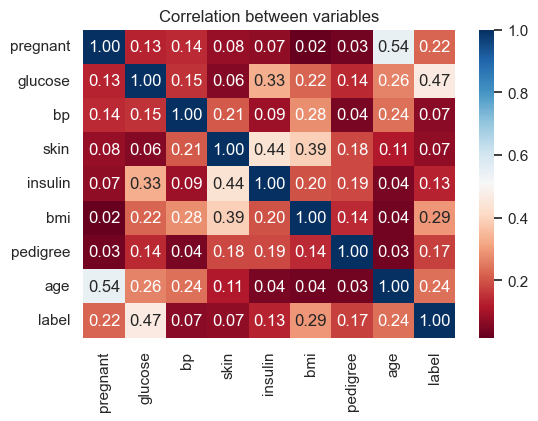

In [48]:
corr_matrix = diabetes_data.corr()
corr_matrix = corr_matrix.abs()
sns.set(rc={'figure.figsize': (6, 4)})
sns.heatmap(corr_matrix, cmap="RdBu", annot=True, fmt=".2f")
plt.title("Correlation between variables")
plt.savefig("./figures/dataUnderstanding/corr_matrix.png")
plt.show()

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


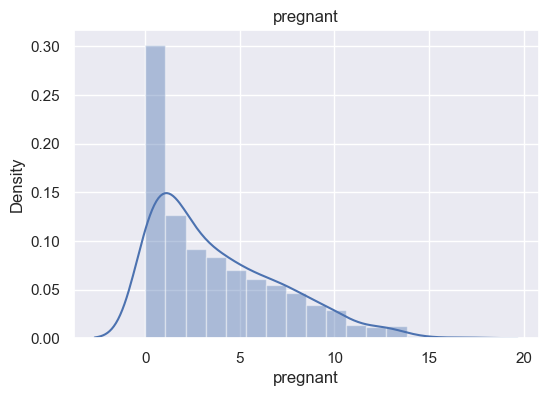

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


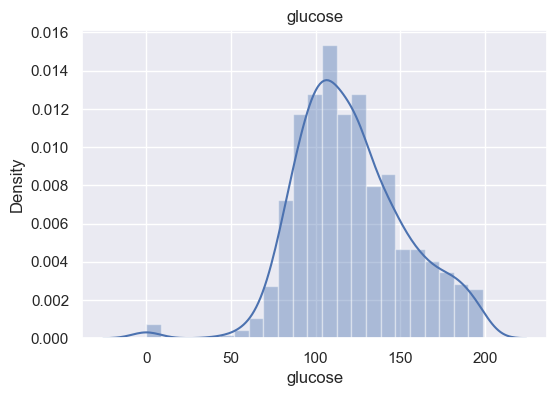

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


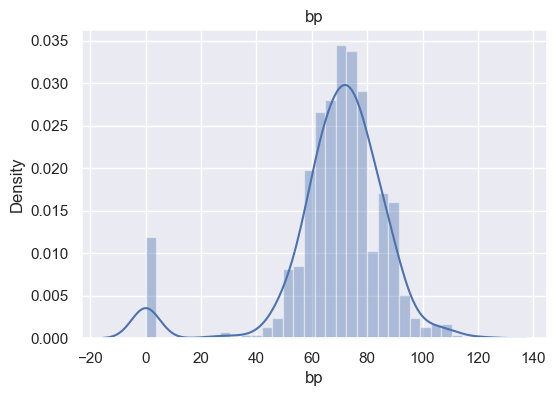

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


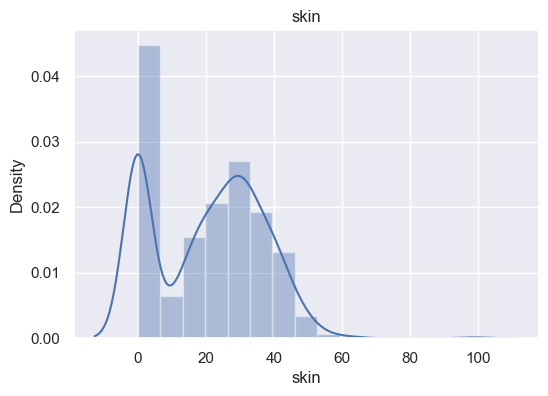

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


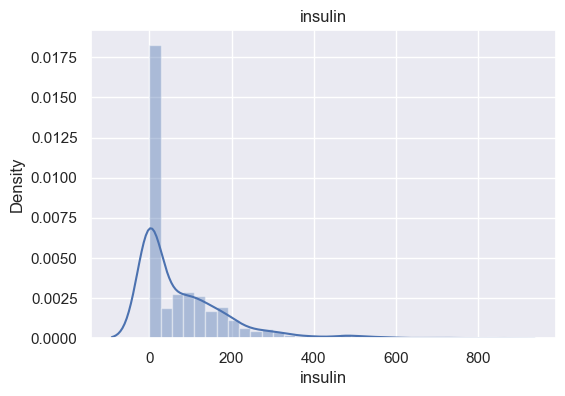

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


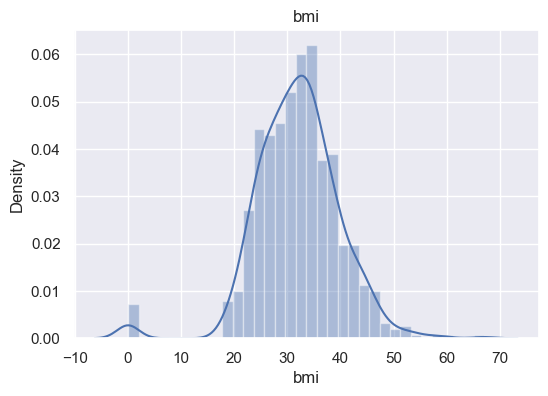

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


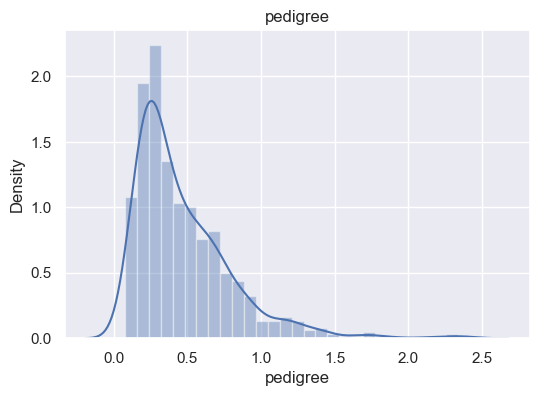

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


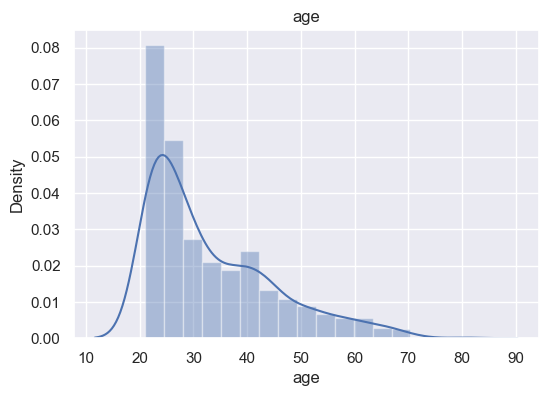

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\4122932121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data[col])


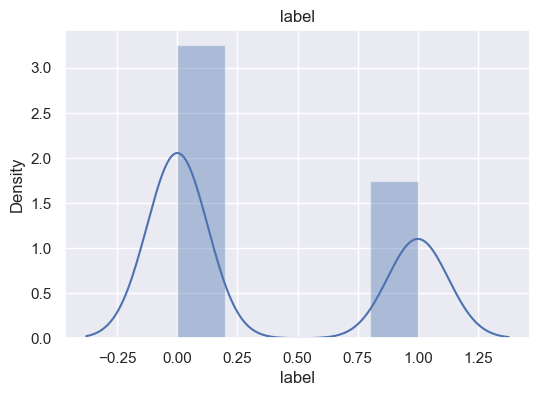

In [49]:
for col in diabetes_data.columns:
    plt.figure()
    sns.distplot(diabetes_data[col])
    plt.title(col)
    plt.savefig("./figures/dataUnderstanding/" + col + "dist.png")
    plt.show()

PROBLEME DE CLASSIFICATION BINAIRE : 
- CLASSE 1 : 
- CLASSE 0 : 

In [50]:
Y = diabetes_data['label']
X = diabetes_data.drop('label', axis=1)

<h3><b>MODEL CREATION

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [54]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

<h3><b>MODEL EVALUATION

In [56]:
print("Accuracy ==> ", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix => \n", metrics.confusion_matrix(y_test, y_pred))

Accuracy ==>  0.7186147186147186
Confusion matrix => 
 [[119  27]
 [ 38  47]]


<h3><b>VISUALIZATION

In [58]:
from sklearn.tree import plot_tree

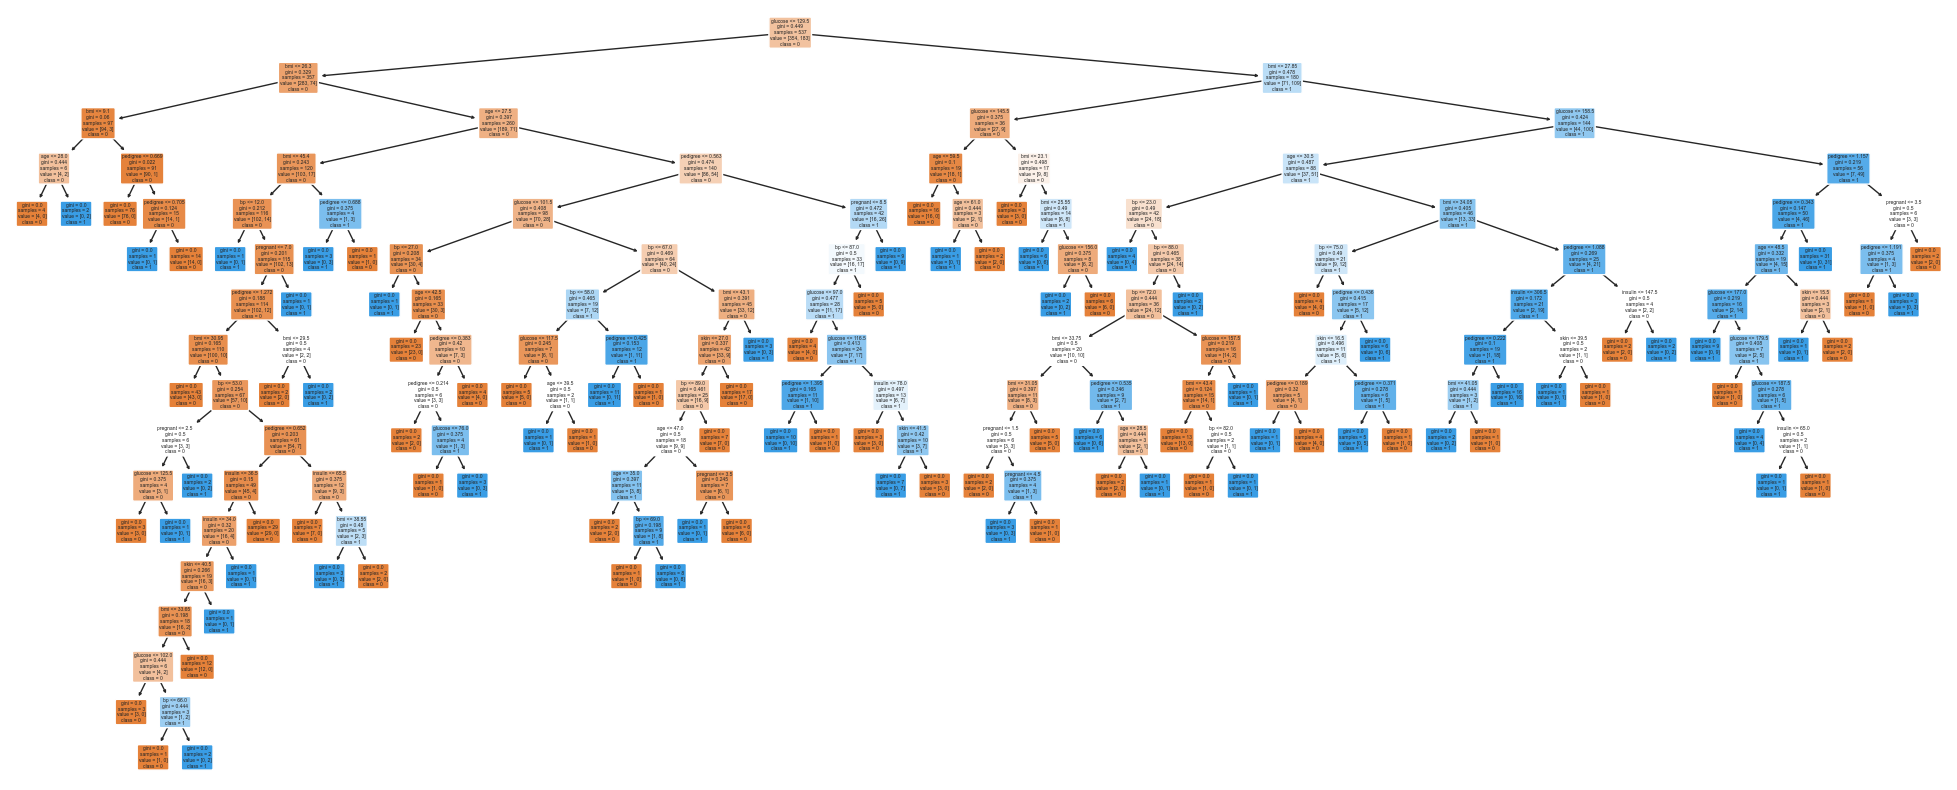

In [60]:
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns)
plt.savefig("./figures/DecisionTree/tree.png")
plt.show()

<h3><b>PERFORMANCE OPTIMIZATION

In [61]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
print("Accuracy ==> ", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix => \n", metrics.confusion_matrix(y_test, y_pred))

Accuracy ==>  0.7705627705627706
Confusion matrix => 
 [[124  22]
 [ 31  54]]


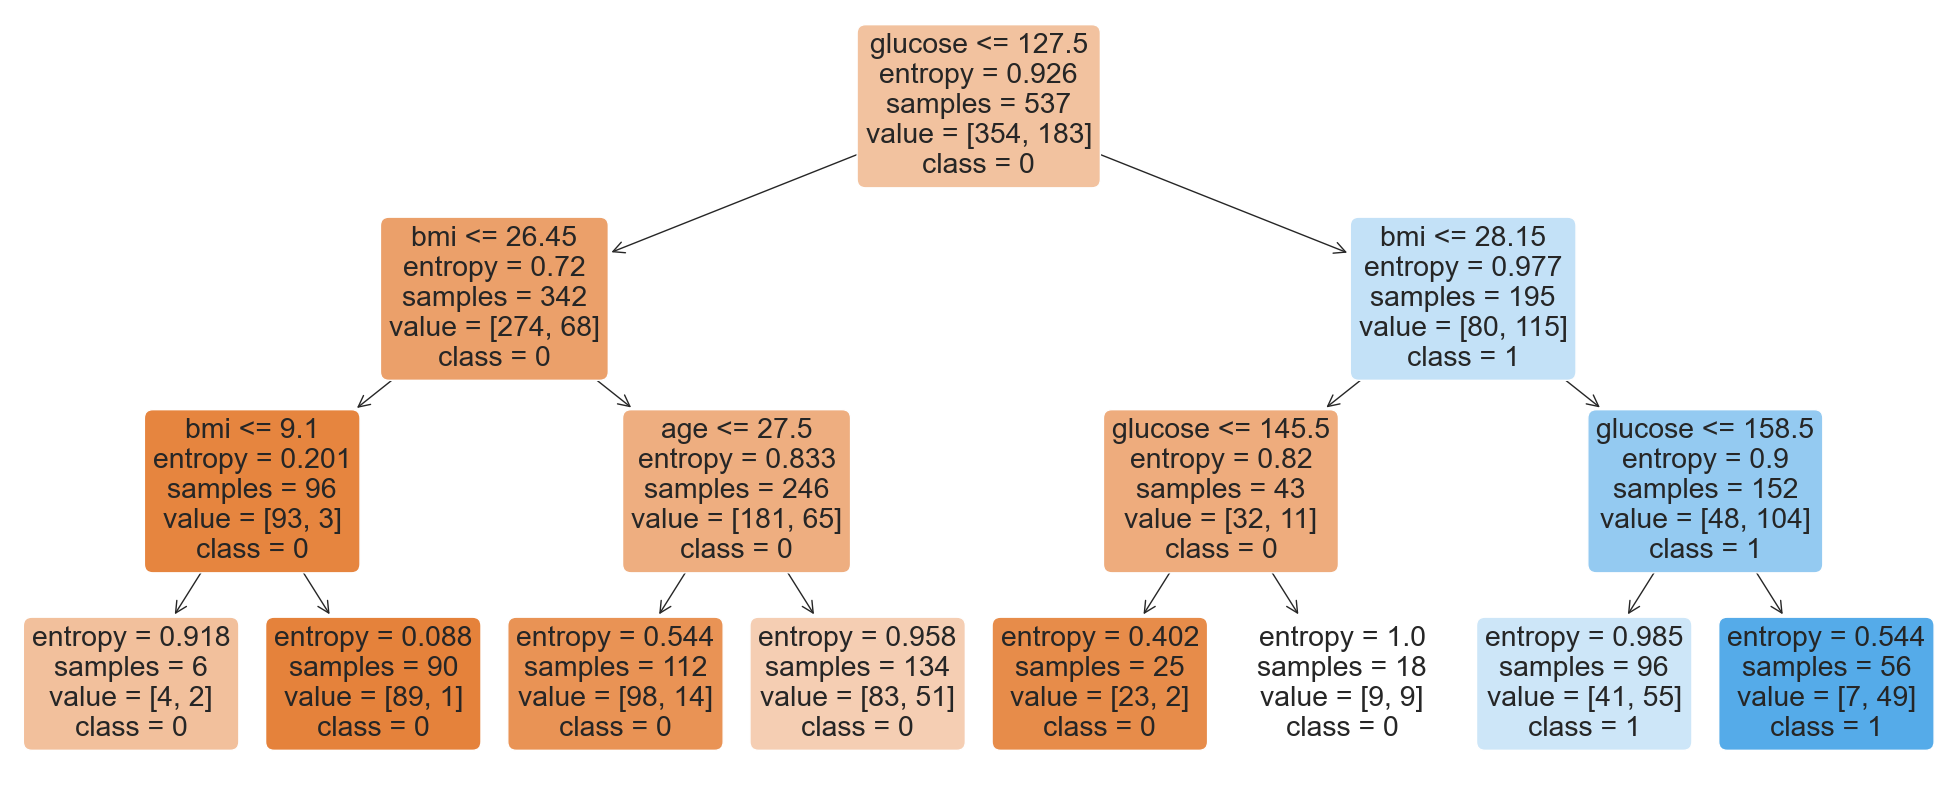

In [63]:
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True, rounded=True, class_names=[
          '0', '1'], feature_names=X.columns)
plt.savefig("./figures/DecisionTree/tree1.png")
plt.show()

<hr>
<h2><b>PART B : RANDOM FORESTS

<h3><b>DATA UNDERSTANDING

In [70]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [75]:
bank_data = pd.read_csv("./datasets/bank_cleaned.csv")

In [76]:
bank_data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [83]:
bank_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [84]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [85]:
bank_data.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object

In [86]:
bank_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [87]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


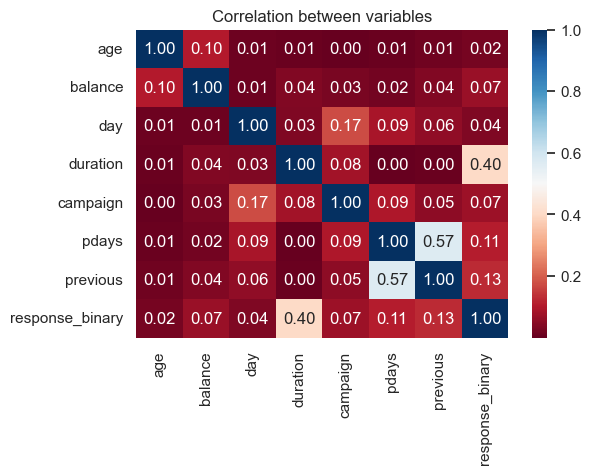

In [93]:
numeric_features = bank_data.select_dtypes(include=[int, float])
corr_matrix = numeric_features.corr()
corr_matrix = corr_matrix.abs()
sns.set(rc={'figure.figsize': (6, 4)})
sns.heatmap(corr_matrix, cmap="RdBu", annot=True, fmt=".2f")
plt.title("Correlation between variables")
plt.savefig("./figures/RandomForest/Bank_corr_matrix.png")
plt.show()

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


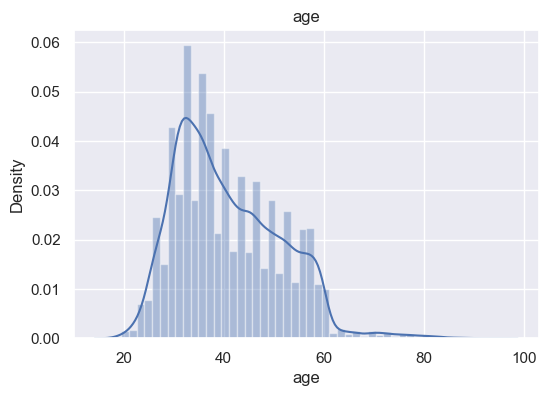

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


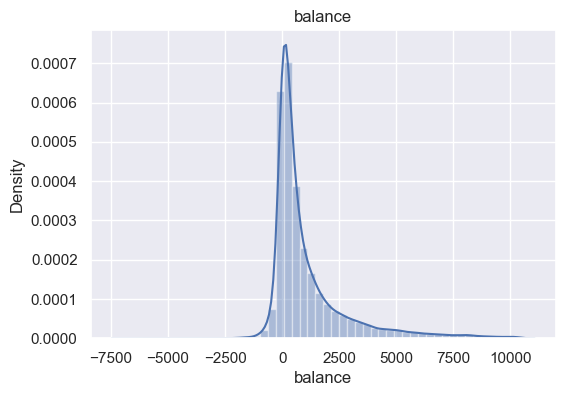

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


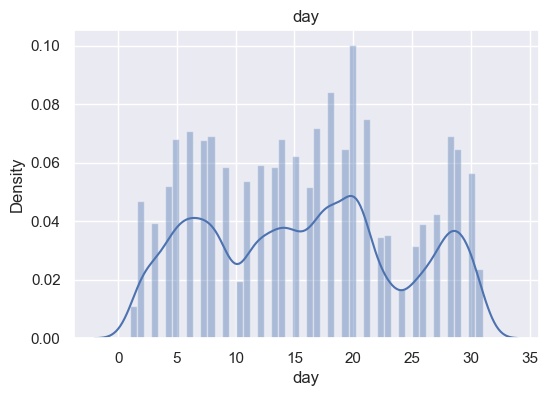

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


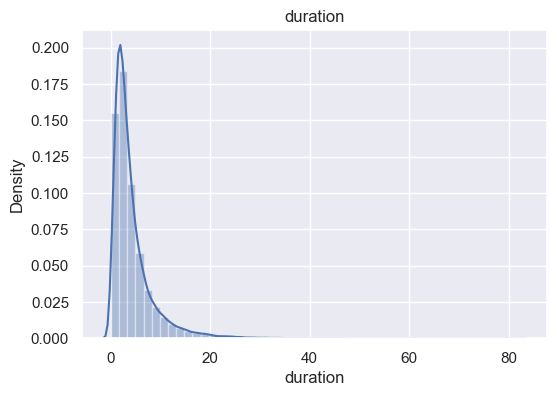

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


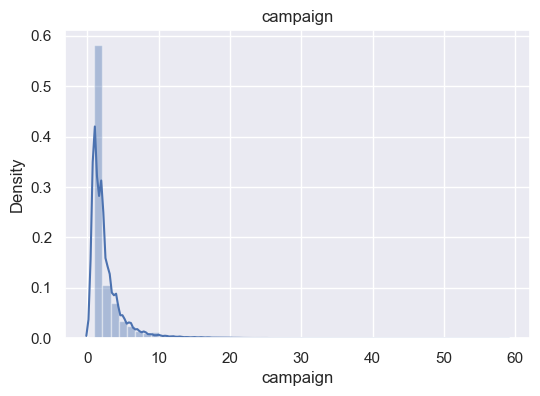

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


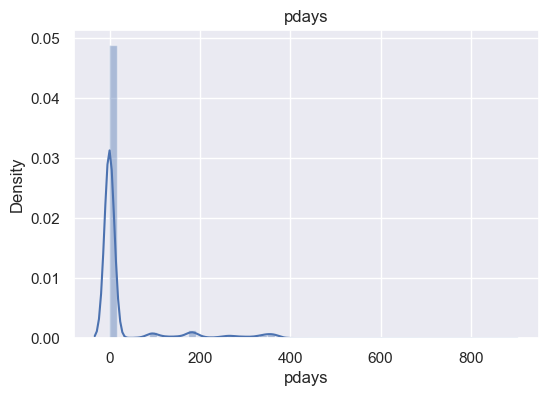

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


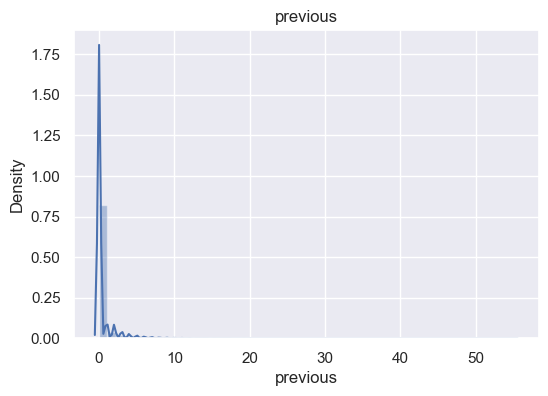

C:\Users\Wissem\AppData\Local\Temp\ipykernel_16580\3750432554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col], bins=50)


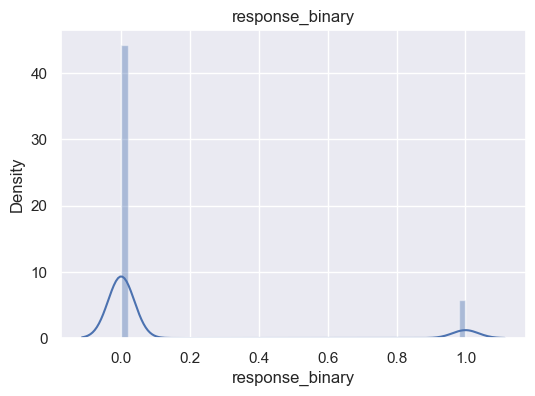

In [98]:
for col in numeric_features.columns:
    plt.figure()
    sns.distplot(bank_data[col], bins=50)
    plt.title(col)
    plt.savefig("./figures/RandomForest/" + col + "_dist.png")
    plt.show()

In [103]:
#TRANSFORM NON NUMERIC DATA TO NUMERIC
bank_data = pd.get_dummies(bank_data, drop_first=True)
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,response_binary,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown,response_yes
0,58,2143,5,4.35,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,True,False
1,44,29,5,2.52,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,True,False
2,33,2,5,1.27,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,True,False
3,35,231,5,2.32,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,28,447,5,3.62,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,True,False


In [104]:
Y = bank_data["response_binary"]
X = bank_data.drop(["response_binary"], axis=1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<h3><b>MODEL CREATION

In [106]:
param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 305}


In [107]:
#EVALUATE MODEL
y_pred = best_rf.predict(X_test)
print("Accuracy ==> ", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix => \n", metrics.confusion_matrix(y_test, y_pred))

Accuracy ==>  1.0
Confusion matrix => 
 [[10825     0]
 [    0  1428]]


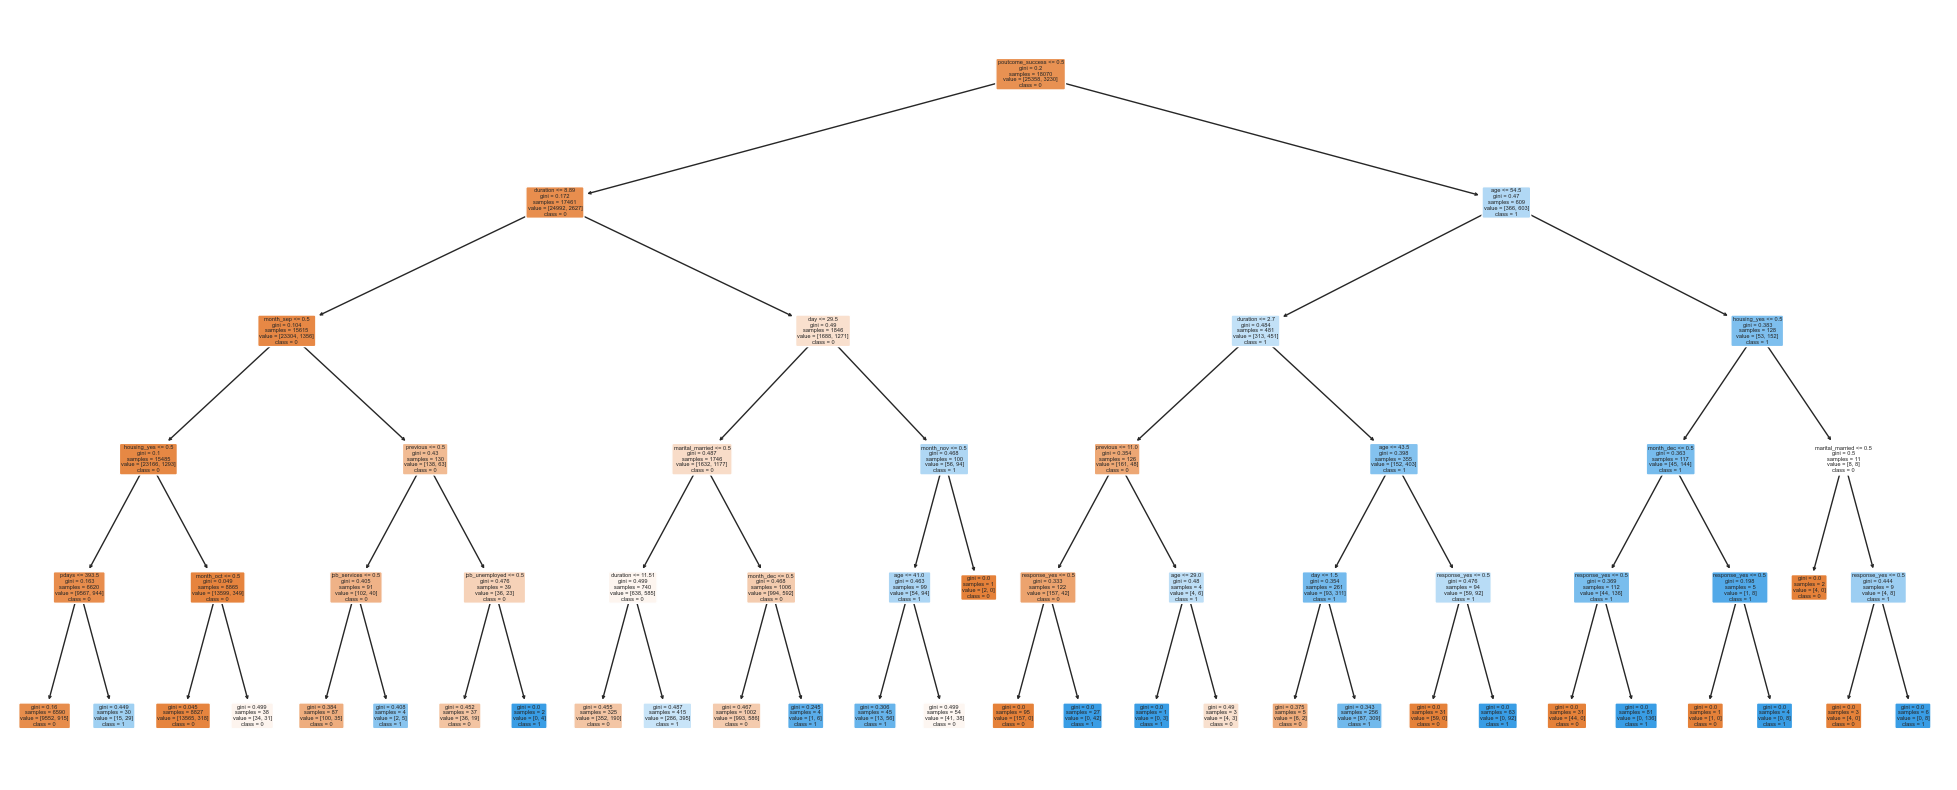

In [108]:
#VIZUALIZE TREE
plt.figure(figsize=(25, 10))
plot_tree(best_rf.estimators_[0], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns)
plt.savefig("./figures/RandomForest/tree.png")
plt.show()